# Classifying Data Using Decision Trees
Decision trees and random forests predict a target based on training
examples, similar to linear/logistic regression. But, they go about it in a different
manner. We'll explore this alternate approach with an aim of comparing to linear/
logistic regression. We'll help our friend the real estate agent make predictions 
for her clients and compare how these new methods compare to what we've seen
previously.


## Infrastructure
We'll load all the libraries and prebuilt functions here for later use:

In [1]:
from sklearn import tree
from sklearn.datasets import load_boston, make_blobs
from sklearn.ensemble import (RandomForestRegressor, RandomForestClassifier,
                              BaggingRegressor, BaggingClassifier,
                              GradientBoostingClassifier,
                              GradientBoostingRegressor)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import scikitplot as skp
%matplotlib inline

def plot_regr(X,y,regr, title, size = 10):
    
    regr.fit(X, y)

    y_pred = regr.predict(X)
    plt.clf()
    plt.plot(y, y_pred, 'o')

    perfect_fit = np.linspace(y.min(),y.max(), 20)
    plt.plot(perfect_fit, perfect_fit, 'b--', label='Perfect Fit')

    
    plt.text(5, 40, "$R^2$ = %.2f" % regr.score(X,y))
    plt.title(title, size = size)
    plt.xlabel('True MEDV ($1,000s)')
    plt.ylabel('Predicted MEDV ($1,000s)')
    plt.legend()
    plt.show()

def plot_roc(X,y,regr, title, size = 10):
    
    regr.fit(X, y)

    y_pred = regr.predict_proba(X)
    text = "Accuracy = %.2f" % regr.score(X, y) 
    plt.text(.5, .5, text)  
    skplt.plot_roc_curve(y, y_pred, title = title)
    plt.show()

def classify(y, threshold):
    y_clf = []
    for val in y:
        if val > threshold:
            y_clf.append(1)
        else:
            y_clf.append(0)

    return np.array(y_clf)

def visualize_classifier(model, X1, y1, X2=None, y2=None, 
                         ax=None, cmap='rainbow', title=''):
    if np.any(X2):
        fig, (ax0, ax1) = plt.subplots(1,2)
        if title:
            fig.suptitle(title)
    else:
        ax0 = ax or plt.gca()
        if title:
            ax0.set_title(title)

    # Plot the training points
    ax0.scatter(X1[:, 0], X1[:, 1], c=y1, s=30, cmap=cmap,
                clim=(y1.min(), y1.max()), zorder=3)
    ax0.axis('tight')
    ax0.axis('off')
    xlim = ax0.get_xlim()
    ylim = ax0.get_ylim()

    # fit the estimator
    model.fit(X1, y1)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                            np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y1))
    contours = ax0.contourf(xx, yy, Z, alpha=0.3,
                            levels=np.arange(n_classes + 1) - 0.5,
                            cmap=cmap, zorder=1)

    ax0.set(xlim=xlim, ylim=ylim)


    if np.any(X2): 


        # Plot the training points
        ax1.scatter(X2[:, 0], X2[:, 1], c=y2, s=30, cmap=cmap,
                    clim=(y.min(), y.max()), zorder=3)
        ax1.axis('tight')
        ax1.axis('off')
        xlim = ax1.get_xlim()
        ylim = ax1.get_ylim()

        # fit the estimator
        model.fit(X2, y2)
        xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                                np.linspace(*ylim, num=200))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

        # Create a color plot with the results
        n_classes = len(np.unique(y2))
        contours = ax1.contourf(xx, yy, Z, alpha=0.3,
                                levels=np.arange(n_classes + 1) - 0.5,
                                cmap=cmap, zorder=1)

        ax1.set(xlim=xlim, ylim=ylim)

def bar_plot(X, y, clfs):
    # cross validation
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    # calculate test/train accuracy for each 
    scores={}
    for name, clf in clfs:
        clf.fit(X, y)
        scores[name] = ( clf.score(X_train, y_train), clf.score(X_test, y_test) )
    # plot in a bar graph
    index = np.arange(len(scores.keys()))
    bar_width = .35
    opacity = .4

    #-----------------Enter your Code Here--------------#
    train = [a for a,b in scores.values()]
    # test should be the other of the pair
    test = []
    # fill in the bar for train
    plt.bar()
    plt.bar(index + bar_width, test, bar_width,
            alpha=opacity, color = 'b', label = 'Test')
    #---------------------------------------------------#

    plt.ylim((.85,1.05))
    ax = plt.gca()
    names = [a for a, b in clfs]
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(names)
    plt.xlabel("Classifier (MEDV > mean)")
    plt.ylabel("Accuracy")
    plt.title("Boston Housing Classifier Accuracy (MEDV > mean")
    plt.legend()
    plt.grid(b=True, which='both')
    plt.show()

## Decision Trees
A decision tree works by taking our data and, by looking for the feature (i.e.
rooms in house, distance to work) that most differentiates the data, bifurcates
continually until it reaches a single training example. An example will help
to illustrate:

![House Decision Tree](dt_house.png)

The tree will try to group similar training examples together by asking  
questions that are the most effective separators. We'll use a decision tree 
to separate a toy data-set:

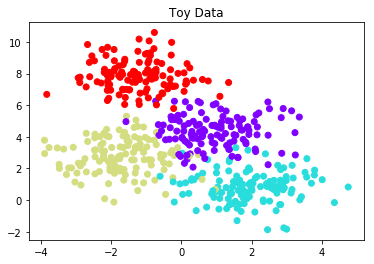

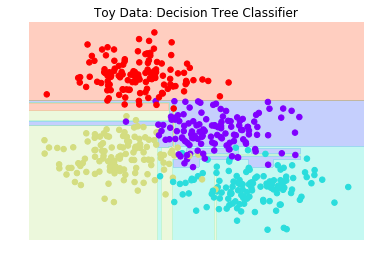

In [2]:
X, y = make_blobs(n_samples = 500, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow')
plt.title("Toy Data")
plt.show()

title = "Toy Data: Decision Tree Classifier"
visualize_classifier(DecisionTreeClassifier(), X, y, title = title)
plt.show()

The edges have no question about them, but once the data starts overlapping,
the decision tree is more unsure of what to do. We see that play out with the 
strange small slices in the middle of the data, where the groups come together.
It turns out this is a major flaw of decision trees, that it tends to learn 
the noise within a data-set and is highly sensitive to changes in the data. This
is another way of describing overfitting.

To further illustrate, we'll take two random subsamples of our data, classify
them with decision trees, then compare the results:

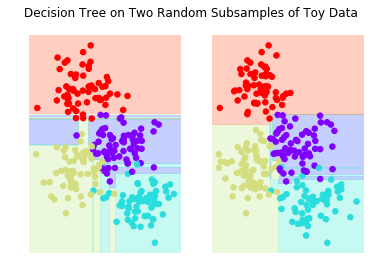

In [3]:
# Subsamples Decision Tree Classifier

ind = np.arange(500)
np.random.shuffle(ind)
X_samp1, y_samp1 = X[ind[:250], :], y[ind[:250]]
np.random.shuffle(ind)
X_samp2, y_samp2 = X[ind[:250], :], y[ind[:250]]


title = "Decision Tree on Two Random Subsamples of Toy Data"
clf = DecisionTreeClassifier()
visualize_classifier(clf, X_samp1, y_samp1, 
                     X2 = X_samp2, y2 = y_samp2, title=title)

plt.show()

Two things: they agree on the edges, but start to disagree in the middle, where
they are unsure. These two samples come from the same data-set, yet we get a 
fair amount of variation in classification, which illustrates the sensitivity to different
data-overfitting-of the Decision Tree algorithm. Additionally, each decision 
tree uses all the features available to classify the data . This creates a 
correlation between trees, which we will solve with a random forest. The random
forest will randomize the features each decision tree classifies with, which 
helps remedy tree correlation. 


## Bagging 

We can tackle overfitting by taking/bootstrapping samples with 
replacement from our training data, classifying them with decision trees, then 
taking the average for a bagged regressor and a majority vote for a bagged 
classifier. 


We'll illustrate bagging by coming back to our friend the real estate agent and 
her Boston Housing data to predict median housing value (MEDV):

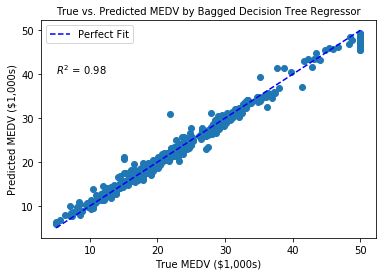

In [4]:
boston = load_boston()
X, y = boston.data, boston.target
regr = BaggingRegressor(n_estimators=100, random_state=0)
title = ("True vs. Predicted MEDV by Bagged Decision Tree Regressor")
plot_regr(X, y, regr, title)

## Random Forests

Random forests fix the correlation issue among trees by taking a random subset
of features to use for each decision tree to classify with. Let's now compare 
that to a random forest regressor:

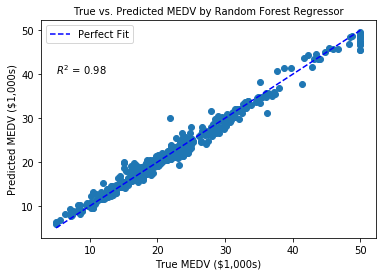

In [5]:
regr = RandomForestRegressor(n_estimators = 100, max_depth = 10)
title = ("True vs. Predicted MEDV by Random Forest Regressor")
plot_regr(X, y, regr, title)

Random forest classifier for MEDV > mean:

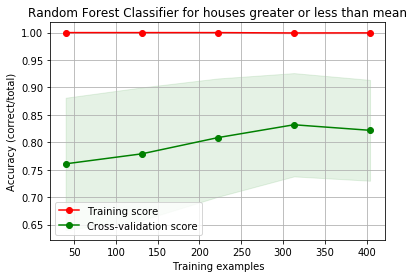

In [6]:
clf = RandomForestClassifier(n_estimators = 100, max_depth = 10)
y_mean = classify(y, y.mean())
title = "Random Forest Classifier for houses greater or less than mean"

skp.estimators.plot_learning_curve(clf, X, y_mean, title, cv = 5)
ax = plt.gca()
ax.set_ylabel("Accuracy (correct/total)")
plt.show()

## Boosting
Bagging takes the average of many decision trees. In contrast, boosting trains
a tree on equally-weighted training examples, then trains another on a training
set with modified weights: it increases the weights of misclassified data. It
continues this process until it arrives at a fairly accurate
regressor/classifier. 

Both regularization and boosting train the models to focus on specific areas.In 
regularization, large parameters get penalized, so the model learns to reduce 
them. Similarly, boosting trains the model to focus on the misclassified data
points, making sure they get the best classification possible.  

Let's get a better feel for boosting with a regressor and classifier:

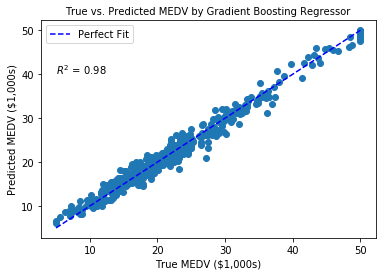

In [7]:
regr = GradientBoostingRegressor()
title = ("True vs. Predicted MEDV by Gradient Boosting Regressor")
plot_regr(X, y, regr, title)


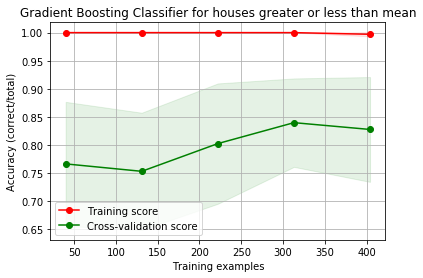

In [8]:
clf = GradientBoostingClassifier()
title = "Gradient Boosting Classifier for houses greater or less than mean"
skp.estimators.plot_learning_curve(clf, X, y_mean, title, cv = 5)
ax = plt.gca()
ax.set_ylabel("Accuracy (correct/total)")
plt.show()

## Exercise
Let's compare all the new methods we investigated. First, you'll need to recall
material from week one on plotting a bar chart and fill in some missing
information.

In [9]:
# test/train accuracies for each model
clfs = [('Decision Tree', DecisionTreeClassifier()),
        ('Bagged DT' , BaggingClassifier()),
        ('Random Forest', RandomForestClassifier()),
        ('Gradient Boost', GradientBoostingClassifier())
       ]

def bar_plot(X, y, clfs):
    # cross validation
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    # calculate test/train accuracy for each 
    scores={}
    for name, clf in clfs:
        clf.fit(X, y)
        scores[name] = ( clf.score(X_train, y_train), clf.score(X_test, y_test) )
    # plot in a bar graph
    index = np.arange(len(scores.keys()))
    bar_width = .35
    opacity = .4

    #-----------------Enter your Code Here--------------#
    train = [a for a,b in scores.values()]
    # grab the test values from scores
    test = []
    # fill in the bar for train
    plt.bar()
    plt.bar(index + bar_width, test, bar_width,
            alpha=opacity, color = 'b', label = 'Test')
    #---------------------------------------------------#

    plt.ylim((.85,1.05))
    ax = plt.gca()
    names = [a for a, b in clfs]
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(names)
    plt.xlabel("Classifier (MEDV > mean)")
    plt.ylabel("Accuracy")
    plt.title("Boston Housing Classifier Accuracy (MEDV > mean")
    plt.legend()
    plt.grid(b=True, which='both')
    plt.show()
bar_plot(X, y_mean, clfs)

/home/geoff/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

## Conclusion

To sum up, we saw a bagged model, random forest, and gradient boosting models
all applied to Boston Housing data. As you can see, the probabilities are
fairly close together, so deciding which to use on a particular dataset isn't 
clearcut. Machine learning still has a degree of art to it, so it's important
to experiment and stay curious when approaching a new analysis. All these
models were examples of supervised learning: we gave them labelled data 
(MEDV > mean or not). Next time, we will explore unsupervised learning, where
the training data will not be labelled.